# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Install MMOCR from source
- Perform inference with
  - a pretrained text recognizer
  - a pretrained text detector
  - pretrained recognizer and detector
  - pretrained Key Information Extraction (KIE) model
- Evaluate a text detection model on an acadmic dataset
- Train a text recognizer with a toy dataset

Let's start!

## Install MMOCR from source

Installing MMOCR is straightforward. We recommend users to install MMOCR from source as any local code changes on MMOCR can take effect immediately, which is needed for research & developement purpose. Refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/get_started/install.html) for more information.

### Install Dependencies using MIM

In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'
!mim install 'mmdet>=3.0.0rc0'

### Install MMOCR

In [ ]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

## Inference

MMOCR has made inference easy by providing a variety of `Inferencer`s. In this section, we will focus on the usage of `MMOCRInferencer`. However, if you want to learn more about other `Inferencer`s, you can refer to the [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html) which provides detailed descriptions.

### Perform Inference with a Pretrained Text Recognizer 

We now demonstrate how to inference on a demo text recognition image with a pretrained text recognizer. SVTR text recognizer is used for this demo, whose checkpoint can be found in the [official documentation](https://mmocr.readthedocs.io/en/dev-1.x/textrecog_models.html#svtr). But you don't need to download it manually -- Our Inferencer script handles these cumbersome setup steps for you! 

Run the following command and you will get the inference result from return value as well as files, which will be  visualized in the end.

In [1]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(rec='svtr-small')
result = infer('demo/demo_text_recog.jpg', save_vis=True, return_vis=True)
print(result['predictions'])

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth
01/25 11:38:11 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

/home/softbd/miniconda3/envs/openmmlab/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


[{'rec_texts': ['star'], 'rec_scores': [0.9995319694280624]}]


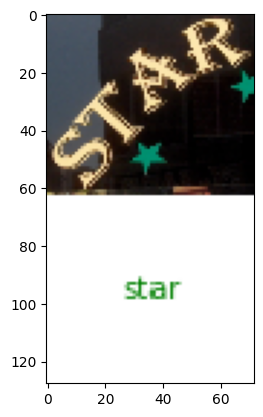

In [2]:
# Visualize the return value
import matplotlib.pyplot as plt
plt.imshow(result['visualization'][0])
plt.show()

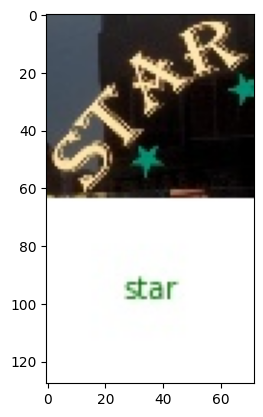

In [3]:
# Visualize the saved image
import mmcv
predicted_img = mmcv.imread('results/vis/demo_text_recog.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

### Perform Inference with a Pretrained Text Detector 

Next, we perform inference with a pretrained DBNet++ text detector and visualize the bounding box results for the demo text detection image.

In [16]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det="DBNet", det_weights="pretrained/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth")
result = infer('demo/10_Column_new_format-2.png', return_vis=True)

Loads checkpoint by local backend from path: pretrained/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


Output()

The model and loaded state dict do not match exactly

unexpected key in source state_dict: neck.asf_conv.conv.weight, neck.asf_conv.conv.bias, neck.asf_attn.channel_wise.0.conv.weight, neck.asf_attn.channel_wise.1.conv.weight, neck.asf_attn.spatial_wise.0.conv.weight, neck.asf_attn.spatial_wise.1.conv.weight, neck.asf_attn.attention_wise.conv.weight


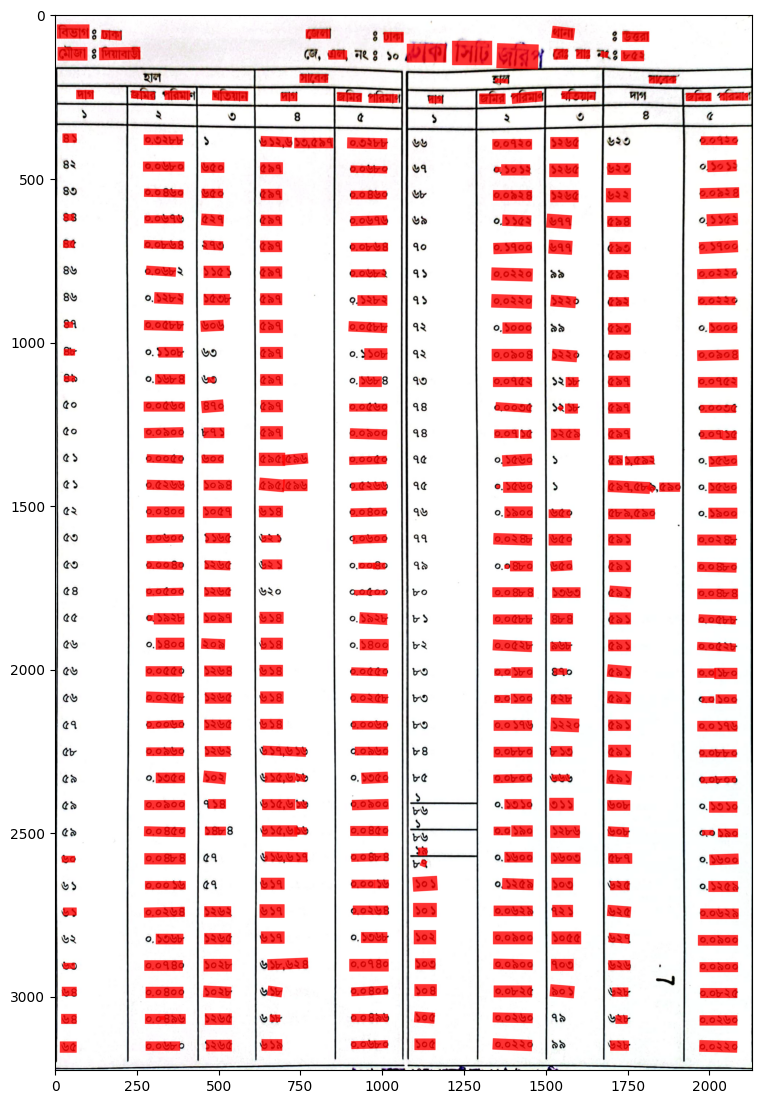

In [17]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

### Perform end-to-end OCR with pretrained recognizer and detector

We can  any text detector and recognizer into a pipeline that forms a standard OCR pipeline. Now we build our own OCR pipeline with DBNet++ and SVTR and apply it to `demo/demo_text_ocr.jpg`.

In [8]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small')
result = infer('demo/demo_text_ocr.jpg', return_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


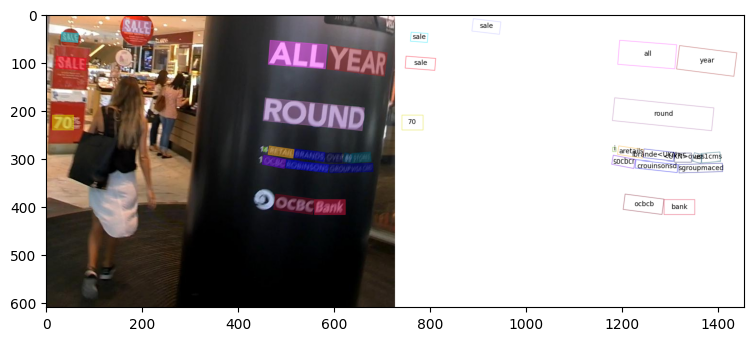

In [9]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

### Combine OCR with Downstream Tasks

MMOCR also supports downstream tasks of OCR, such as key information extraction (KIE). We can even add a KIE model, SDMG-R, to the pipeline applied to `demo/demo_kie.jpeg` and visualize its prediction.


In [10]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small', kie='SDMGR')
result = infer('demo/demo_kie.jpeg', save_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt/sdmgr_unet16_60e_wildreceipt_20220825_151648-22419f37.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std


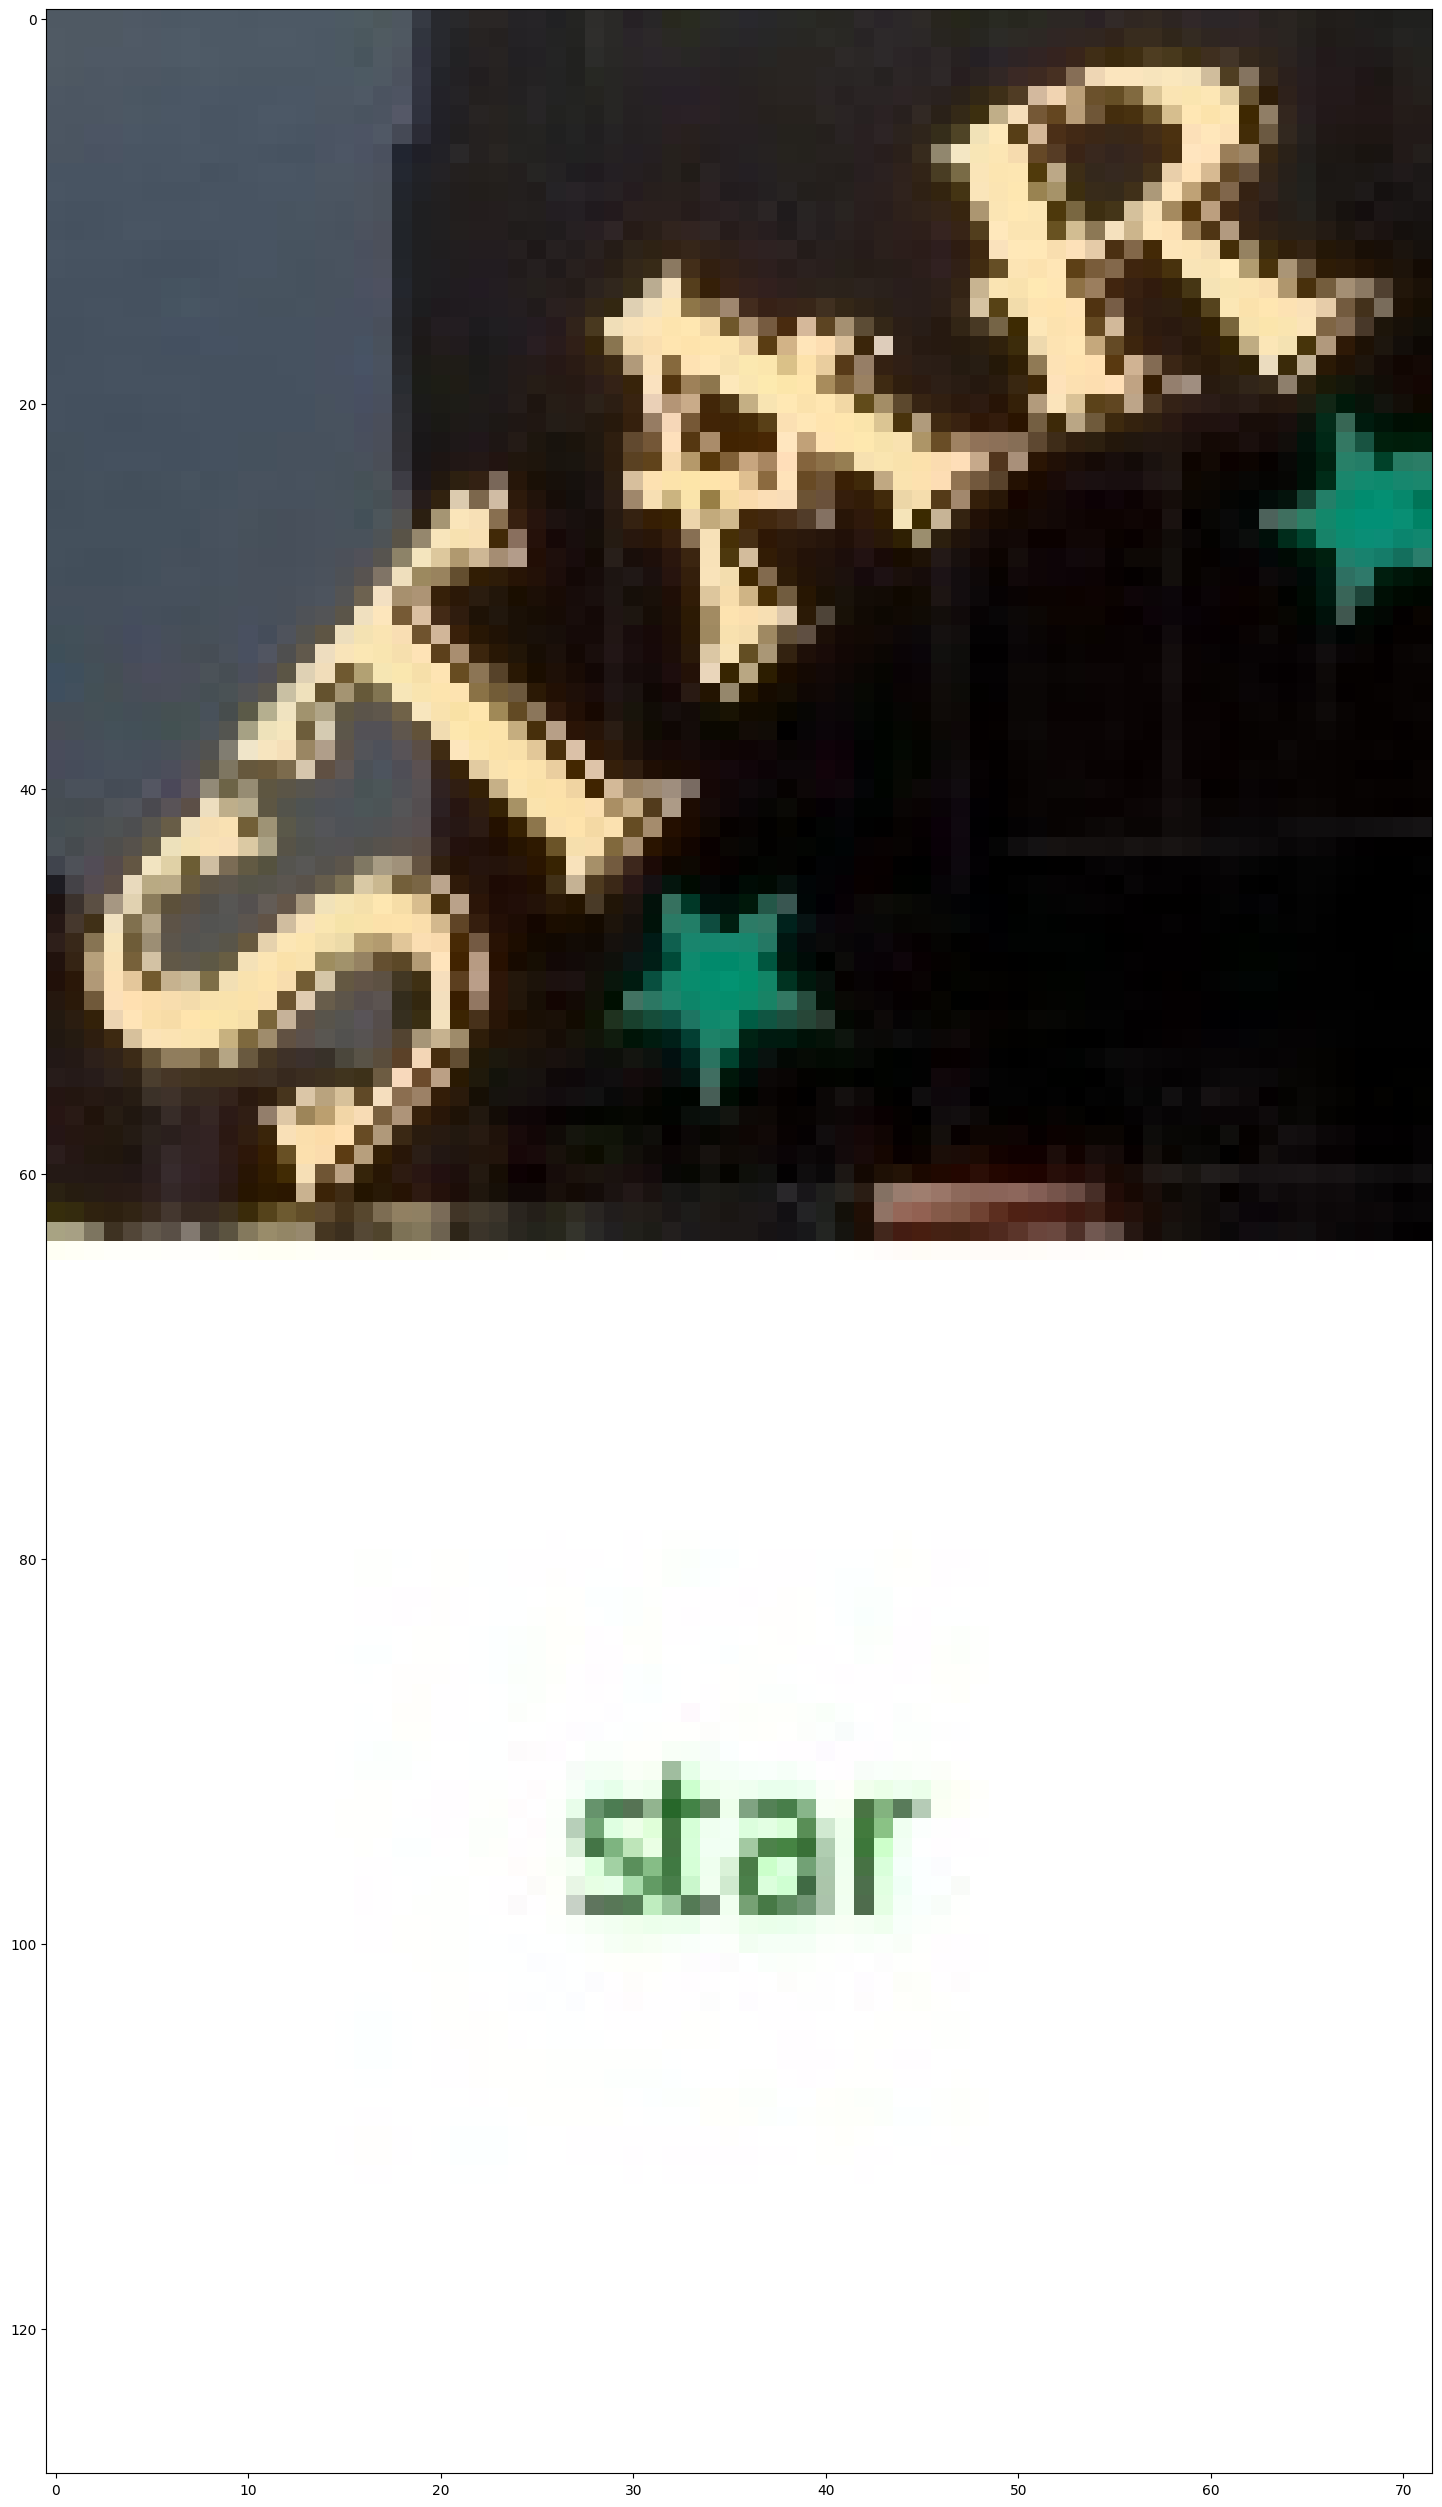

In [11]:
# Visualize the results
import mmcv
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./results/vis/demo_text_recog.jpg')
plt.figure(figsize=(18, 32))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Training SAR on a Toy Dataset

We now demonstrate how to train a recognizer on a provided dataset in a Python interpreter. Another common practice is to train a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#training).

Since training a full academic dataset is time consuming (usually takes about several hours or even days), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a model usually consists of the following steps:
1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should never be a concern if the dataset is obtained from Dataset Preparer. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/recog.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for training. 
3. Train the model. 

In this example, we will use an off-the-shelf toy dataset to train SAR, and the first step will be skipped. The full demonstration of the first step can be found at the next section: Evaluating SAR on academic testsets.

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. The toy dataset consisits of ten images as well as annotation files in both json and lmdb format, and we only use json annotations in this tutorial.

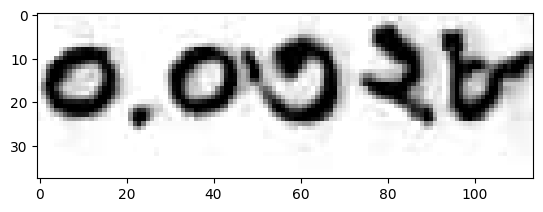

In [1]:
import mmcv
import matplotlib.pyplot as plt 

DIR_NAME = "tests/data/dlrms_dhaka"

img = mmcv.imread(DIR_NAME+'/imgs/0.0.328--94d97cef897945ae8b9349d9fde85cb2.png')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [4]:
# Inspect the labels of the annootation file
!cat tests/data/dlrms_dhaka/labels.json

{"metainfo": {"dataset_type": "TextRecogDataset", "task_name": "textrecog"}, "data_list": [{"instances": [{"text": "344"}], "img_path": "344--51548d0f5dab4b1ea811cdbe737dc47f.png"}, {"instances": [{"text": "372"}], "img_path": "372--2611c06f2ff0478593044138c936255d.png"}, {"instances": [{"text": "437"}], "img_path": "437--9f17857c369f4fb6b706291cac5c430f.png"}, {"instances": [{"text": "444"}], "img_path": "444--20e664910c7e4e0194dba5b14ba62959.png"}, {"instances": [{"text": "766"}], "img_path": "766--d051f472e65a44879e163437ab535858.png"}, {"instances": [{"text": "980"}], "img_path": "980--db2cff88223348518f3d64da95c6affb.png"}, {"instances": [{"text": "1286"}], "img_path": "1286--f7cf0a02e3bc45b0b7473f78e85efc12.png"}, {"instances": [{"text": "1554"}], "img_path": "1554--029dd2d07a2b4d59ad6f0a904cafb5f5.png"}, {"instances": [{"text": "1555"}], "img_path": "1555--038ec42b2b0f463a8b4fc3c5841096ee.png"}, {"instances": [{"text": "639"}], "img_path": "639--2501a7168234482cae313f809256f808.

### Load Config

First we will load the toy config for SAR.


In [2]:
from mmengine import Config
# Load the config
cfg = Config.fromfile('configs/textrecog/crnn/crnn_mini-vgg_5e_dlrms.py')


In order to train SAR to its best state on toy dataset, we need to modify some hyperparameters in the config to accomodate some of the settings of colab.
For more explanation about the config and its fields, please refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/config.html).

In [3]:
# Specify the work dir

cfg.work_dir = 'work_dirs/crnn_mini_5e_dlrms_parallel-decoder_5e_dlms/'
# Configure the batch size, learning rate, and maximum epochs
cfg.optim_wrapper.optimizer.lr = 1e-3
cfg.train_dataloader.batch_size = 5
cfg.train_cfg.max_epochs = 10
# Save checkpoint every 10 epochs
cfg.default_hooks.checkpoint.interval = 10

# We don't need any learning rate scheduler for a toy dataset
# thus clear parameter scheduler here
cfg.param_scheduler = None

# Set seed thus the results are more reproducible
cfg.randomness = dict(seed=0)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
default_hooks = dict(
    checkpoint=dict(interval=10, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    sync_buffer=dict(type='SyncBuffersHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(
        draw_gt=False,
        draw_pred=False,
        enable=False,
        interval=1,
        show=False,
        type='VisualizationHook'))
default_scope = 'mmocr'
dictionary = dict(
    dict_file=
    '/home/softbd/workstation/own/python/mmocr/configs/textrecog/crnn/../../../dicts/lower_english_digits.txt',
    type='Dictionary',
    with_padding=True)
dlms_data_root = 'tests/data/dlrms_dhaka'
dlms_rec_test = dict(
    ann_file='labels.json',
    data_prefix=dict(img_path='imgs/'),
    data_root='tests/data/dlrms_dhaka',
    pipeline=None,
    test_mode=True,
    type='OCRDataset')
dlms_rec_train = dict(
    ann_file='labels.json',
    da

In [4]:
cfg.env_variables

{}

### Train the SAR Text Recognizer 
Let's train the SAR text recognizer on the toy dataset for 10 epochs. 

In [5]:
from mmengine.runner import Runner
import time

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.train()

01/15 20:10:46 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
    CUDA available: False
    numpy_random_seed: 0
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.0
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -Wno-deprecated -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DL

CRNN(
  (data_preprocessor): TextRecogDataPreprocessor()
  (backbone): MiniVGG(
    (cnn): Sequential(
      (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu0): ReLU(inplace=True)
      (pooling0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu1): ReLU(inplace=True)
      (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu3): ReLU(inplace=True)
      (pooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 1), padding=(0, 1), dilation=1, ceil_mode=False)
      (conv4): Conv2d(256, 512, kernel

### Perform inference and Visualize the Predictions

We can test the model through [Infernecer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html), then print out and visualize its return values. Inferencer can also accepts many more types of inputs, just feel free to play around with it.

Output()

Loads checkpoint by local backend from path: work_dirs/crnn_mini_5e_dlrms_parallel-decoder_5e_dlms/epoch_10.pth


result: [{'text': '', 'scores': nan}]


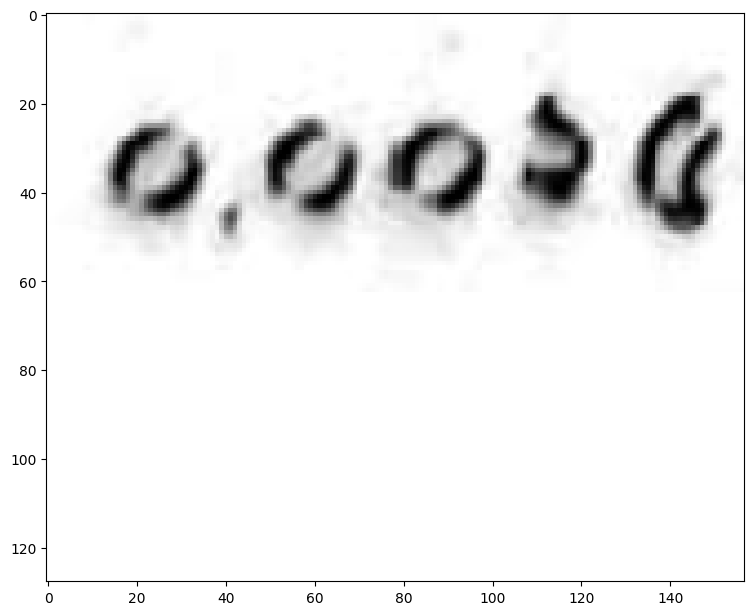

In [10]:
import matplotlib.pyplot as plt
from mmocr.apis import TextRecInferencer
from mmocr import 

img = 'tests/data/dlrms_dhaka/imgs/0.0025--542eaa62e28d41f686701e1fcf7c1f04.png'
checkpoint = "work_dirs/crnn_mini_5e_dlrms_parallel-decoder_5e_dlms/epoch_10.pth"
cfg_file = "configs/textrecog/crnn/crnn_mini-vgg_5e_dlrms.py"

infer = TextRecInferencer(cfg_file, checkpoint)
result = infer(img, return_vis=True)

print(f'result: {result["predictions"]}' )

plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

## Evaluating SAR

This section provides guidance on how to evaluate a model using with pretrained weights in a Python interpreter. Apart from such a practice, another common practice is to test a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#testing).

Typically, the evaluation process involves several steps:

1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should not be a concern if the dataset is obtained from [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html), which can download, extract and convert the dataset into a MMOCR-ready form with a single line of command. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/det.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for testing. 
3. Test the model. 

Now we will demonstrate how to test a model on different datasets.


### Toy Dataset

With the checkpoint we obtained from the last section, we can evaluate it on the toy dataset again. Some more explanataions about the evaulation metrics are available [here](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/evaluation.html). 

In [ ]:
from mmengine.runner import Runner
import time

# The location of pretrained weight
cfg['load_from'] = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_100.pth'

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

It's also possible to evaluate with a stronger and more generalized pretrained weight, which were trained on larger datasets and achieved quite competitve acadmical performance, though it may not defeat the previous checkpoint overfitted to the toy dataset. ([readme](https://mmocr.readthedocs.io/en/dev-1.x/textrecog_models.html#sar))


In [ ]:
# The location of pretrained weight
cfg['load_from'] = 'https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth'
cfg.visualizer.name = f'{time.localtime()}'
runner = Runner.from_cfg(cfg)
runner.test()

### SVTP Dataset

SVTP dataset is one of the six commonly used academic test sets that systematically reflects a text recognizer's performance. Now we will evaluate SAR on this dataset, and we are going to use [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html) to get it prepared first.

In [2]:
!python tools/dataset_converters/prepare_dataset.py namjari_khotian --task textrecog

Dataset Name: Incidental Scene Text IC15
License Type: CC BY 4.0
License Link: https://creativecommons.org/licenses/by/4.0/
BibTeX: @inproceedings{karatzas2015icdar, title={ICDAR 2015 competition on robust reading}, author={Karatzas, Dimosthenis and Gomez-Bigorda, Lluis and Nicolaou, Anguelos and Ghosh, Suman and Bagdanov, Andrew and Iwamura, Masakazu and Matas, Jiri and Neumann, Lukas and Chandrasekhar, Vijay Ramaseshan and Lu, Shijian and others}, booktitle={2015 13th international conference on document analysis and recognition (ICDAR)}, pages={1156--1160}, year={2015}, organization={IEEE}}
MMOCR does not own the dataset. Using this dataset you must accept the license provided by the owners, and cite the corresponding papers appropriately.
If you do not agree with the above license, please cancel the progress immediately by pressing ctrl+c. Otherwise, you are deemed to accept the terms and conditions.
5...
4...
3...
2...
1...
Obtaining train Dataset...
Downloading...
URL: http://0.0

SVTP is now available in `data/svtp`, and the dataset config is available at `configs/textrecog/_base_/datasets/svtp.py`. Now we first point the `test_dataloader` to SVTP, then perform testing with the overfitted checkpoint. As this checkpoint is just overfitted to such a small dataset, it's not surprising that it performs well on the toy dataset and bad on SVTP.

In [ ]:
from mmengine import Config

svtp_cfg = Config.fromfile('configs/textrecog/_base_/datasets/svtp.py')
svtp_cfg.svtp_textrecog_test.pipeline = cfg.test_pipeline
cfg.test_dataloader.dataset = svtp_cfg.svtp_textrecog_test

# The location of pretrained weight
cfg['load_from'] = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_100.pth'

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

Let's evaluate the pretrained one for comparision.

In [ ]:
# The location of pretrained weight
cfg['load_from'] = 'https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth'
cfg.visualizer.name = f'{time.localtime()}'
runner = Runner.from_cfg(cfg)
runner.test()

Loads checkpoint by local backend from path: pretrained/epoch_200.pth
01/16 22:31:17 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

/home/softbd/miniconda3/envs/openmmlab/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


result: [{'text': '00328', 'scores': 0.9318811893463135}]


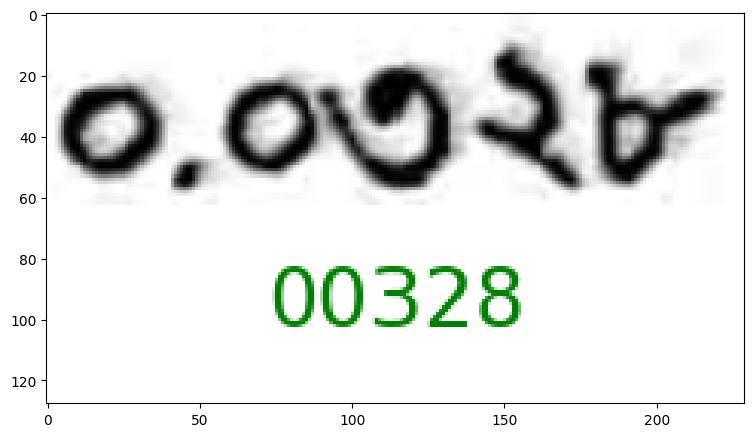

In [1]:
import matplotlib.pyplot as plt
import torch
from mmocr.apis import TextRecInferencer
import glob

# img = 'tests/data/dlrms_dhaka/imgs/0.0.328--688c400d4e1c4c02960835b4f07018f6.png'
checkpoint = "pretrained/epoch_200.pth"
cfg_file = "configs/textrecog/crnn/crnn_mini-vgg_5e_dlrms.py"

infer = TextRecInferencer(cfg_file, checkpoint, batch_size=1)
result = infer(img, return_vis=True, batch_size=)

print(f'result: {result["predictions"]}' )

plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

In [5]:
model.keys()

dict_keys(['meta', 'state_dict', 'message_hub', 'optimizer', 'param_schedulers'])

In [22]:
import matplotlib.pyplot as plt
import torch
from mmocr.apis import TextRecInferencer
import glob
import cv2

# images = []
# counter = 0
# for pth in glob.glob('tests/data/dlrms_dhaka/imgs/*.png'):
#     if counter == 300:
#         break
#     try:
#         img = cv2.imread(pth, cv2.IMREAD_COLOR)
#         images.append(img)
#     except:
#         pass


result = infer(images, return_vis=False, batch_size=100)

print(f'result: {result["predictions"]}' )

# plt.figure(figsize=(9, 16))
# plt.imshow(result['visualization'][0])
# plt.show()

Output()

result: [{'text': '38', 'scores': 0.9999394416809082}, {'text': '630638', 'scores': 0.9287071625391642}, {'text': '04306', 'scores': 0.9983359217643738}, {'text': '9', 'scores': 0.9955522418022156}, {'text': '264', 'scores': 0.8697400093078613}, {'text': '2639', 'scores': 0.9995295405387878}, {'text': '00656', 'scores': 0.9147872686386108}, {'text': '735', 'scores': 0.999595026175181}, {'text': '958', 'scores': 0.9369861483573914}, {'text': '169', 'scores': 0.9750391443570455}, {'text': '00453', 'scores': 0.9999811887741089}, {'text': '80', 'scores': 0.9999274611473083}, {'text': 'o', 'scores': 0.9992942810058594}, {'text': '2639', 'scores': 0.6366635113954544}, {'text': '2', 'scores': 0.999993085861206}, {'text': '46', 'scores': 0.9999347925186157}, {'text': '742', 'scores': 0.9990027944246928}, {'text': '00212', 'scores': 0.9992074370384216}, {'text': 'o', 'scores': 0.9200761914253235}, {'text': '5091', 'scores': 0.9967459887266159}, {'text': '00180', 'scores': 0.9996994853019714}, {

In [19]:
def cv2_imshow(img, winname='window', wait=1000, window_size=(500, 700)):
    cv2.namedWindow(f'{winname}', cv2.WINDOW_NORMAL)
    cv2.resizeWindow(f'{winname}', window_size[0], window_size[1])
    cv2.imshow(f'{winname}', img)
    cv2.waitKey(wait)
    cv2.destroyAllWindows()

for img, res in zip(images, result["predictions"]):
    cv2_imshow(img, res['text'], wait=0)

QObject::moveToThread: Current thread (0x10e725c0) is not the object's thread (0xef18540).
Cannot move to target thread (0x10e725c0)

QObject::moveToThread: Current thread (0x10e725c0) is not the object's thread (0xef18540).
Cannot move to target thread (0x10e725c0)

QObject::moveToThread: Current thread (0x10e725c0) is not the object's thread (0xef18540).
Cannot move to target thread (0x10e725c0)

QObject::moveToThread: Current thread (0x10e725c0) is not the object's thread (0xef18540).
Cannot move to target thread (0x10e725c0)

QObject::moveToThread: Current thread (0x10e725c0) is not the object's thread (0xef18540).
Cannot move to target thread (0x10e725c0)

QObject::moveToThread: Current thread (0x10e725c0) is not the object's thread (0xef18540).
Cannot move to target thread (0x10e725c0)

QObject::moveToThread: Current thread (0x10e725c0) is not the object's thread (0xef18540).
Cannot move to target thread (0x10e725c0)

QObject::moveToThread: Current thread (0x10e725c0) is not the 

error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:449: error: (-215:Assertion failed) !winname.empty() in function 'namedWindow'


In [23]:
len(images)

3234

In [12]:
infer.cfg.keys()

dict_keys(['default_scope', 'env_cfg', 'randomness', 'default_hooks', 'log_level', 'log_processor', 'load_from', 'resume', 'val_evaluator', 'test_evaluator', 'vis_backends', 'visualizer', 'tta_model', 'dlms_data_root', 'dlms_rec_train', 'dlms_rec_test', 'optim_wrapper', 'train_cfg', 'val_cfg', 'test_cfg', 'param_scheduler', 'dictionary', 'model', 'train_pipeline', 'test_pipeline', 'tta_pipeline', 'train_list', 'test_list', 'train_dataloader', 'val_dataloader', 'test_dataloader'])

In [20]:
infer.model.

CRNN(
  (data_preprocessor): TextRecogDataPreprocessor()
  (backbone): MiniVGG(
    (cnn): Sequential(
      (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu0): ReLU(inplace=True)
      (pooling0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu1): ReLU(inplace=True)
      (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu3): ReLU(inplace=True)
      (pooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 1), padding=(0, 1), dilation=1, ceil_mode=False)
      (conv4): Conv2d(256, 512, kernel

In [1]:
cv2_imshow(images, "box", 0)

NameError: name 'cv2_imshow' is not defined